<a href="https://colab.research.google.com/github/yangjunmo131/Linear_Algebra2/blob/main/matrix_decomposition_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import PIL
from PIL import Image

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=595x842 at 0x7F5B4477A8F0>
PNG
(595, 842)
RGBA


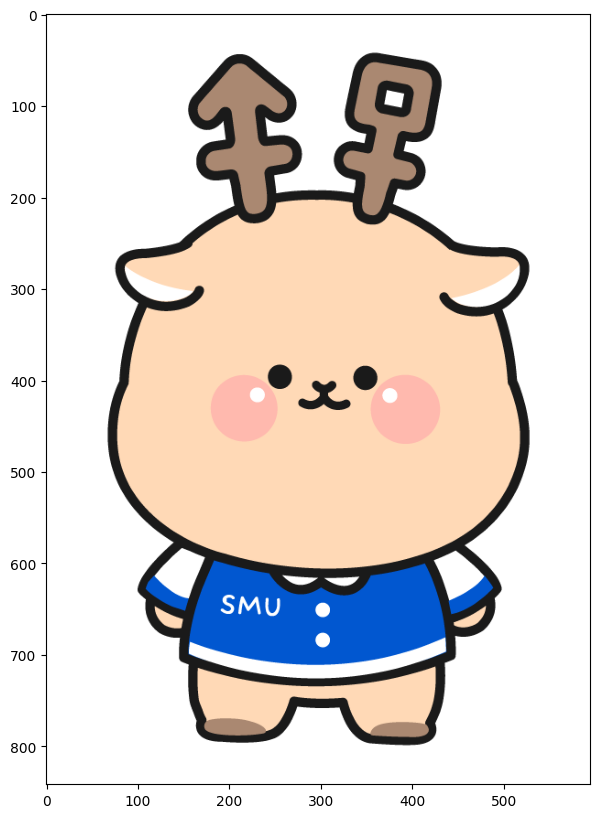

In [79]:

smung = Image.open('smung.png')
print(smung)
print(smung.format)
print(smung.size)
print(smung.mode)

plt.imshow(smung)
plt.show()

In [82]:
imMatrix = np.array(smung.convert("L"))/255.0
print(imMatrix.shape)
print(imMatrix)

(842, 595)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(842, 842) (842, 595) (595, 595)
True


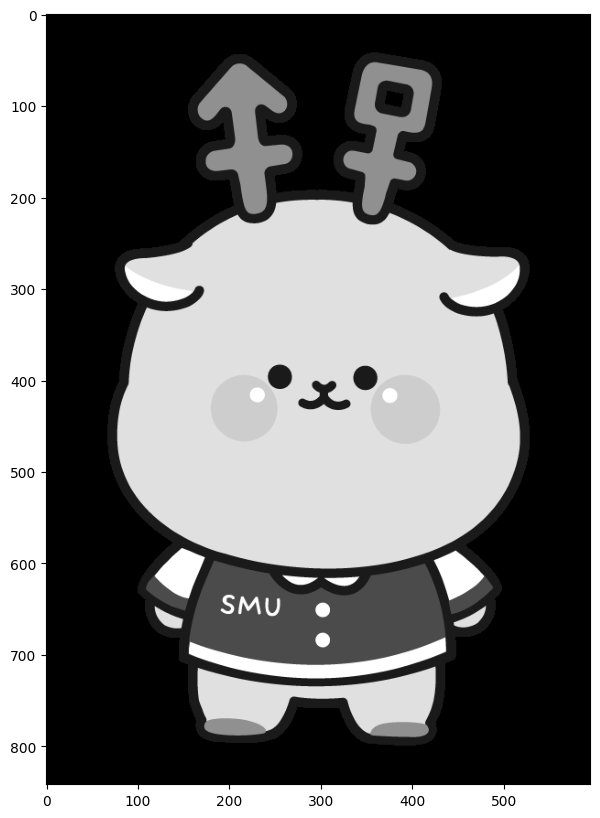

In [83]:
scalar = 1/2
shape = np.shape(imMatrix)
U, S, V = npl.svd(imMatrix)

if shape[0] > shape[1]:
  Sd = np.vstack([np.eye(shape[1])*S.copy(),np.zeros((shape[0]-shape[1],shape[1]))])
else:
  Sd = np.hstack([np.eye(shape[0])*S.copy(),np.zeros((shape[0],shape[1]-shape[0]))])
print(np.shape(U), np.shape(Sd),np.shape(V))
usv = U @ Sd @ V
print(np.allclose(imMatrix, usv))

plt.imshow(usv, cmap = 'gray')
plt.show()

(842, 1)
(1, 1)
(1, 595)
2 [(842, 595), (842, 842), (842, 595), (595, 595)]
1438 500990 0.002870316772789876


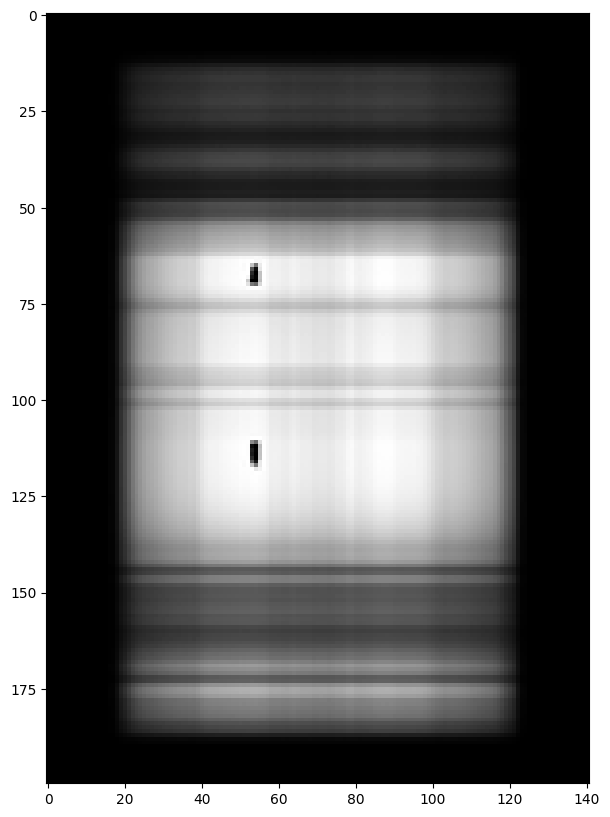

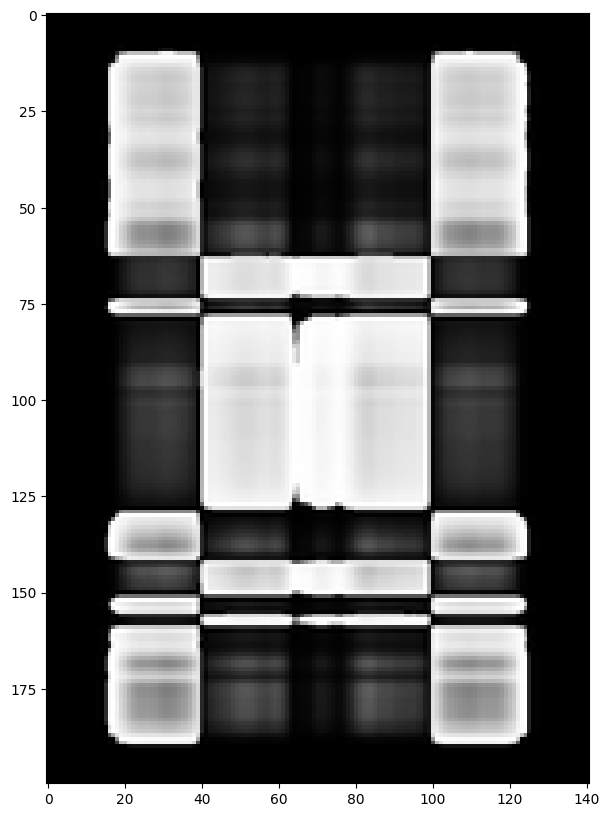

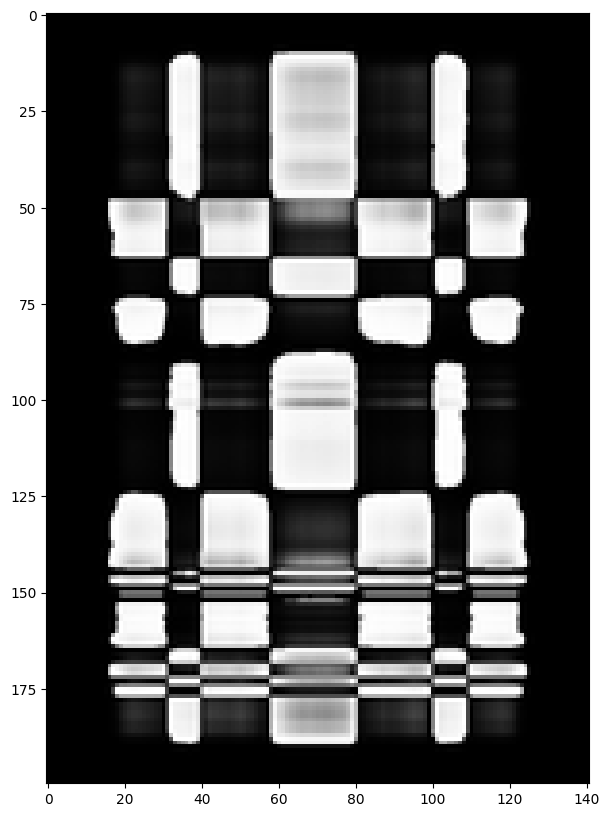

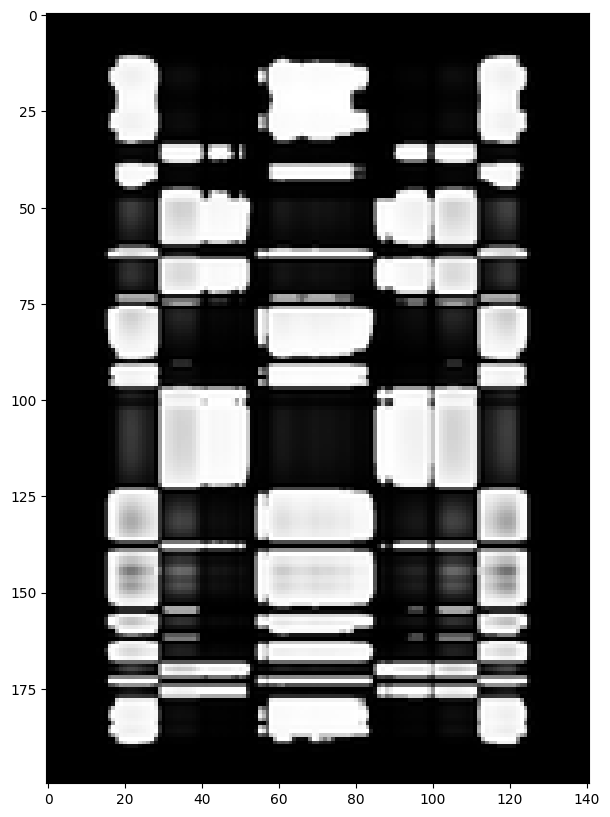

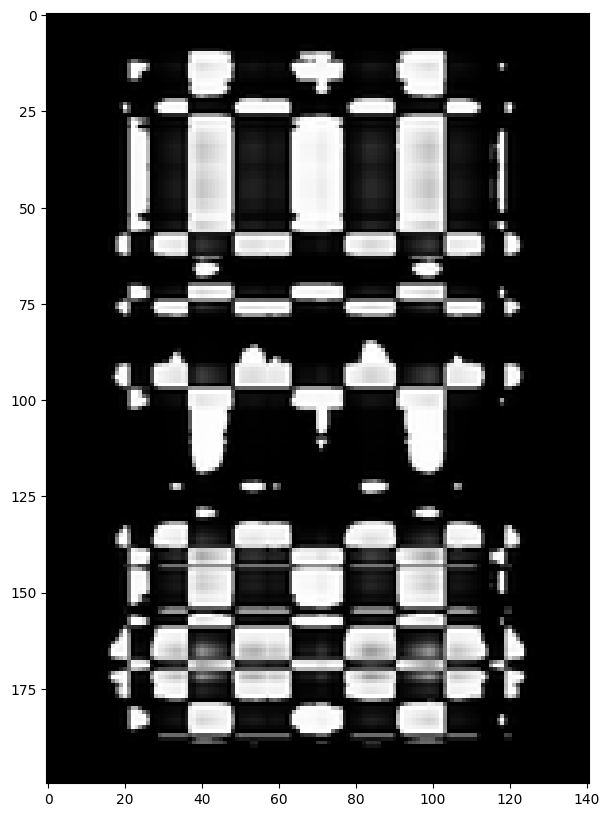

In [84]:
k = 1
print(np.shape(U[:,:k]))
print(np.shape(np.diag(S[:k])))
print(np.shape(V.T[:,:k].T))

m,n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
print(np.ndim(imMatrix),[np.shape(i) for i in [imMatrix, U, Sd, V]])
print(partial, total, partial/total)

size = (200, 200)
imtemp = lambda k: (np.vstack(U[:,k-1])@np.vstack([S[k-1]])@np.vstack(V[k-1]).T)*255
for i in list(range(1,6)):
  im = Image.fromarray(imtemp(i).astype('uint8'))
  im.thumbnail(size, Image.ANTIALIAS)
  plt.imshow(im, cmap = 'gray')
  plt.show()

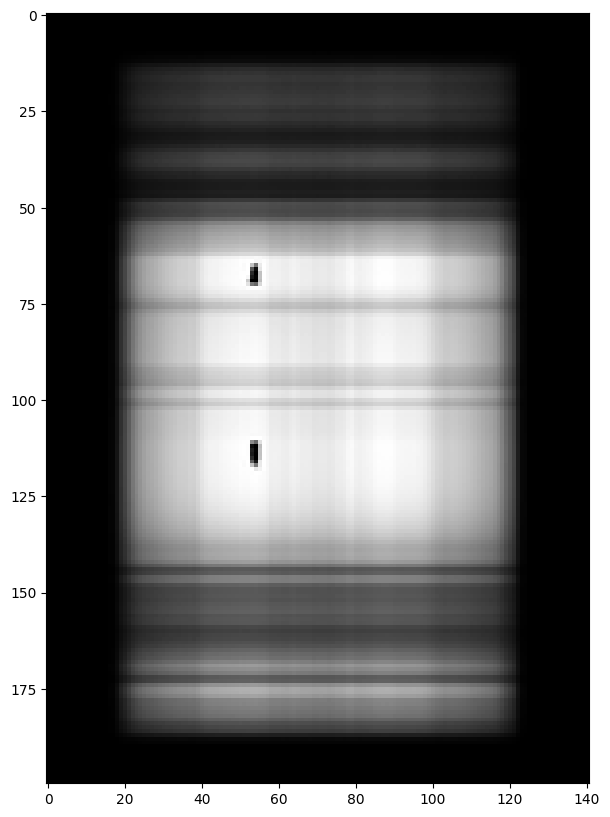

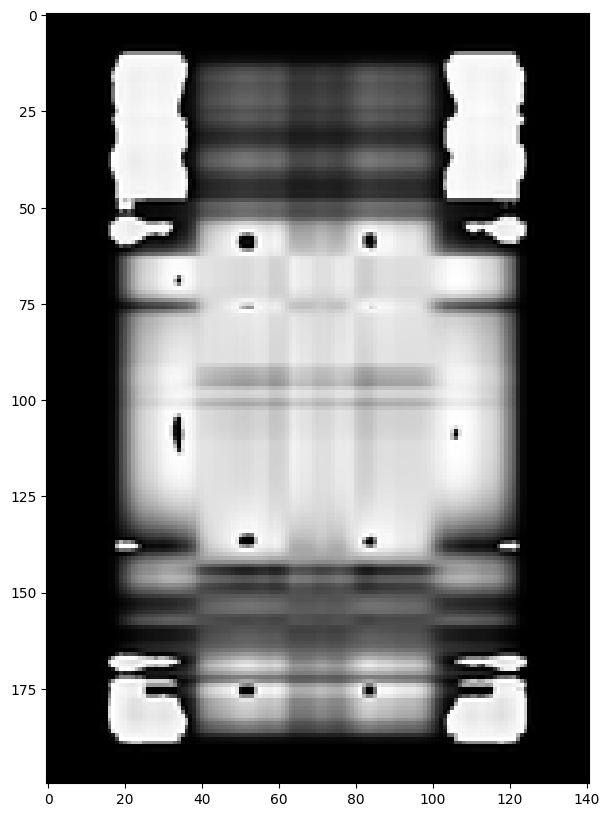

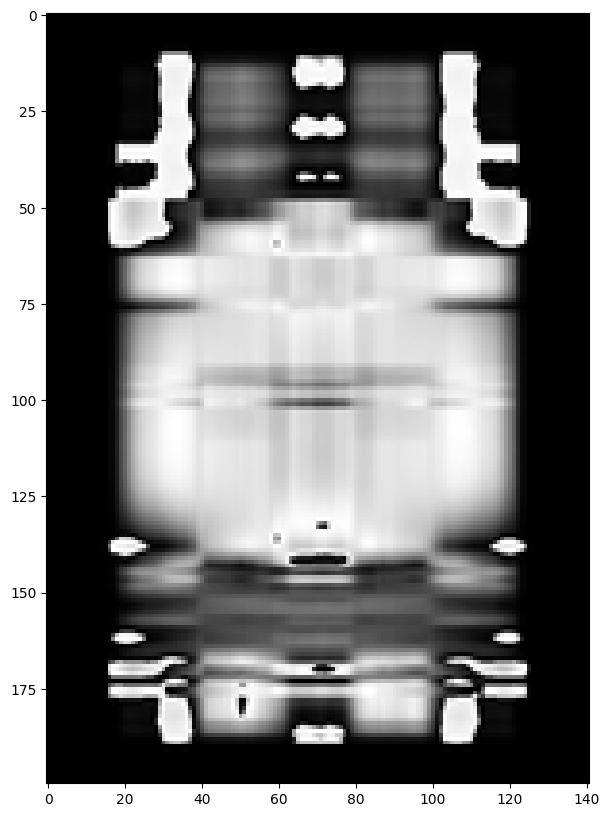

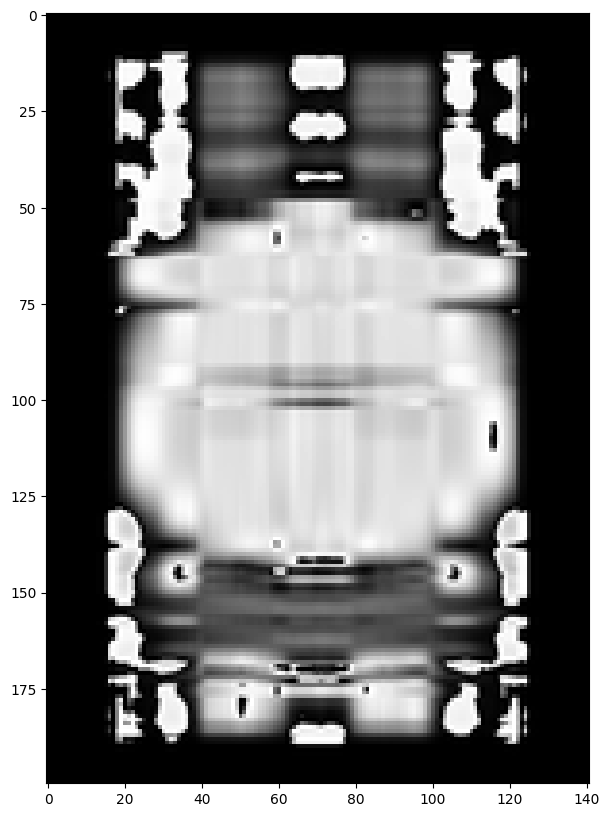

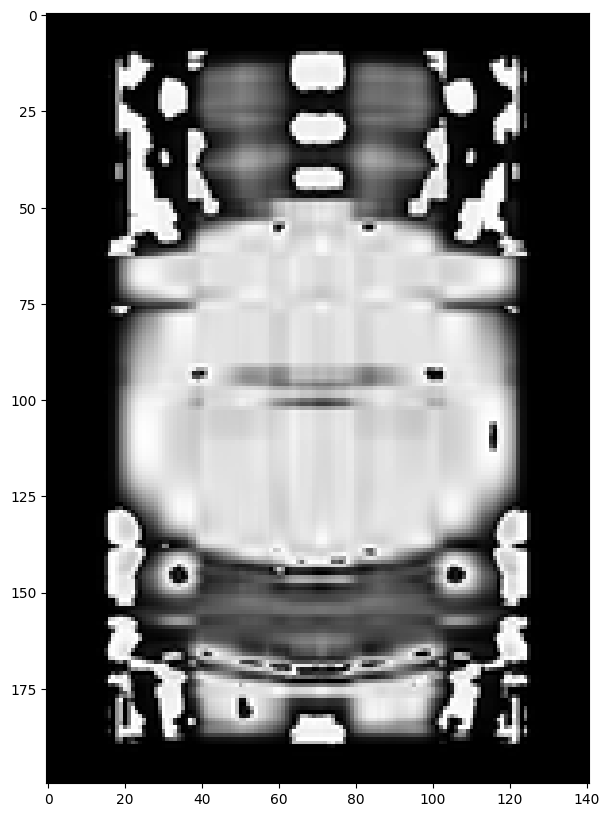

In [85]:
quality = 5
np.shape(np.diag(S[:quality]))
np.shape(U[:,:quality])
np.shape(V[:quality,:])
k = quality
m,n = np.shape(imMatrix)
partial, total = k*(m+n)+k, m*n
np.ndim(imMatrix), [np.shape(i) for i in [imMatrix,U,Sd,V]]
partial, total, partial/total

imtemp = lambda k: (U[:,:k]@np.diag(S[:k])@V.T[:,:k].T)*255
for i in list(range(1,k+1)):
  im = Image.fromarray(imtemp(i).astype('uint8'))
  im.thumbnail(size, Image.ANTIALIAS)
  plt.imshow(im, cmap = 'gray')
  plt.show()

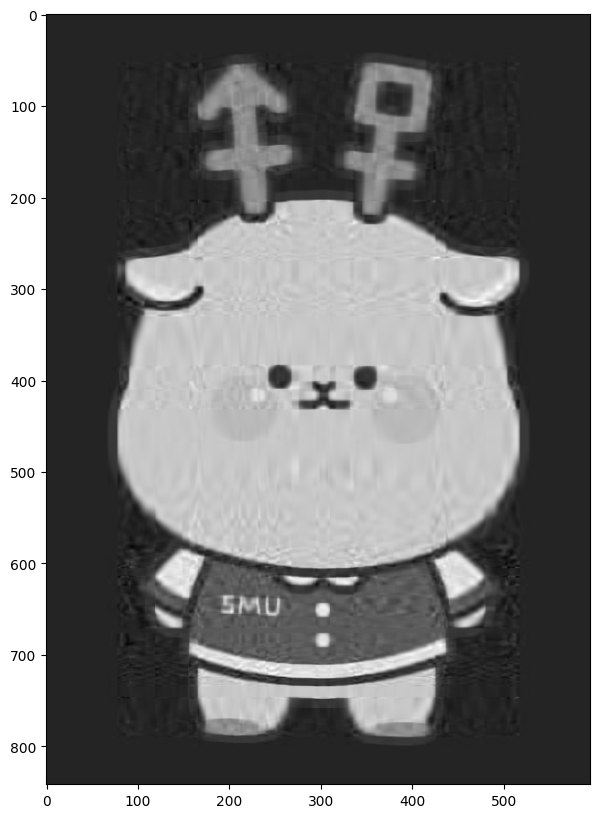

In [86]:
k = 30
im = imtemp(k)
m,n = np.shape(imMatrix)
partial, total = (k*(m+n)+k, m*n)
partial, total, partial/total

plt.imshow(im, cmap = 'gray')
plt.show()